In [20]:
#Gradient Descent For Linear Regression

In [24]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

In [26]:
x_train = np.array([1.0,2.0]) #Features
y_train = np.array([300.0,500.0]) # target value

In [36]:
#Function to caculate the cost
def compute_cost(x,y,w,b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1/(2*m) * cost
    return total_cost

In [30]:
def compute_gradient(x,y,w,b):
    """"
    Computes the gradient for linear regression
    Args:
    x (ndarray (m,)): Data m examples
    y(ndarray (m,)): target values
    w,b(scalar) : model parameters
returns 
df_dw (scalar):The gradient of the cost w.r.t the parameters w
dj_db(scalar): The gradient of the cost w.r.t the parameters """

#Number of training examples
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = ( f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_dw


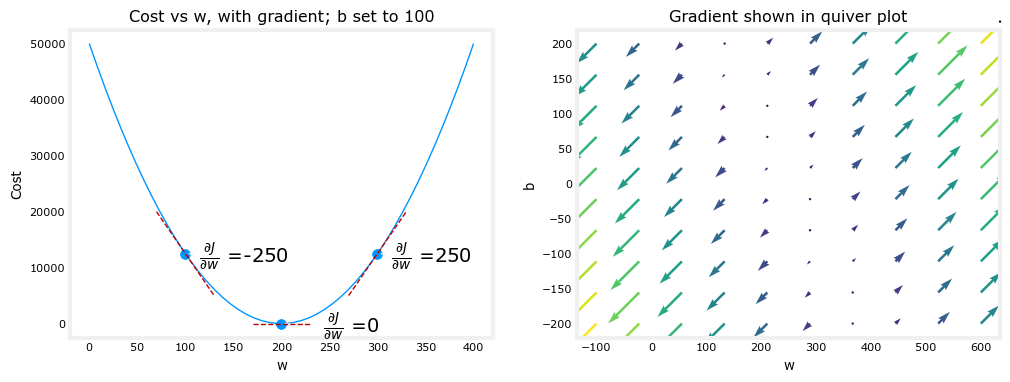

In [38]:
#Use compute_gradient function to find and plot some partial derivatives of our cost function
plt_gradients(x_train, y_train,compute_cost,compute_gradient)
plt.show()

In [142]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alph.
    Args:
    x (ndarray (m,)) : Data, m examples
    y (ndarray (m,)) : target values
    w_in, b_in(scalar): initial values of model parameters
    alpha (float): learning rate
    num_iters(int): number of iterations to run gradient descent
    cost_function: function to call to produce cost - difference between y hat and target y
    gradient_function: function to call to produce gradient
    Returns
        w (scalar): Updated value of aparameter after running gradient descent
        b(scalar): updated value of parameters after running gradient descent
        j_history(list): History of vost values
        p_history (list): History of parameters [2,b]
        """

    J_history = []
    p_history = []
    b = b_in
    w = w_in

    for i in range(num_iters):
    #caculate the gradient and update the parameters using gradient function
        dj_dw, dj_db = gradient_function(x,y,w,b)

    #update parameters using equation (3) above
        b = b - alpha * dj_db
        w = w- alpha * dj_dw

    #save cost J at each iteration 
        if i<10000: #prevent resource exhaustion
            J_history.append(cost_function(x,y,w,b))
            p_history.append([w,b])

    #print cost at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost{J_history[-1]:0.2e}",
            f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}",
            f"w:{w:0.3e}, b:{b: 0.5e}")
    return w,b, J_history, p_history # return w and J, w history for graphing

In [87]:
#initialize parameters
w_init = 0
b_init = 0

#some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2

#run gradient descent
w_final,b_final,J_hist,p_hist = gradient_descent(x_train,y_train,w_init,b_init, tmp_alpha, iterations, compute_cost,compute_gradient)

                                                
print(f"(w,b found by gradient descent:({w_final:8.4f}, {b_final:8.4f})")                                               

Iteration    0: Cost7.83e+04 dj_dw: -6.500e+02, dj_db: -6.500e+02 w:6.500e+00, b: 6.50000e+00
Iteration 1000: Cost1.95e+02 dj_dw: -1.364e-12, dj_db: -1.364e-12 w:1.625e+02, b: 1.62500e+02
Iteration 2000: Cost1.95e+02 dj_dw: -1.364e-12, dj_db: -1.364e-12 w:1.625e+02, b: 1.62500e+02
Iteration 3000: Cost1.95e+02 dj_dw: -1.364e-12, dj_db: -1.364e-12 w:1.625e+02, b: 1.62500e+02
Iteration 4000: Cost1.95e+02 dj_dw: -1.364e-12, dj_db: -1.364e-12 w:1.625e+02, b: 1.62500e+02
Iteration 5000: Cost1.95e+02 dj_dw: -1.364e-12, dj_db: -1.364e-12 w:1.625e+02, b: 1.62500e+02
Iteration 6000: Cost1.95e+02 dj_dw: -1.364e-12, dj_db: -1.364e-12 w:1.625e+02, b: 1.62500e+02
Iteration 7000: Cost1.95e+02 dj_dw: -1.364e-12, dj_db: -1.364e-12 w:1.625e+02, b: 1.62500e+02
Iteration 8000: Cost1.95e+02 dj_dw: -1.364e-12, dj_db: -1.364e-12 w:1.625e+02, b: 1.62500e+02
Iteration 9000: Cost1.95e+02 dj_dw: -1.364e-12, dj_db: -1.364e-12 w:1.625e+02, b: 1.62500e+02
(w,b found by gradient descent:(162.5000, 162.5000)


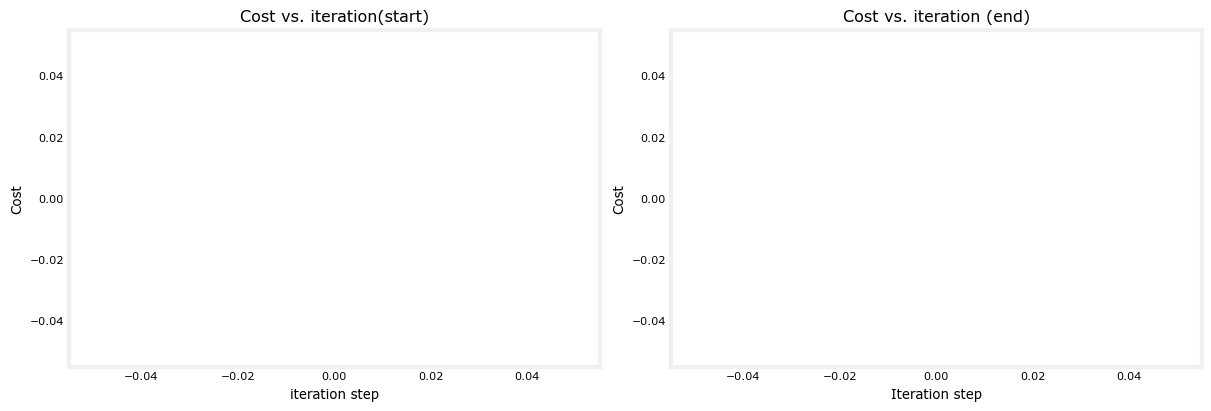

In [99]:
#Cost should always decrease in the successful application of gradient descent
##This algorithm will note the cost on the axes and iteration step.

#plot cost versus iteration
fig, (ax1,ax2) = plt.subplots(1,2, constrained_layout = True, figsize =(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)"); ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')       ; ax2.set_ylabel('Cost')
ax1.set_xlabel("iteration step")   ; ax2.set_xlabel("Iteration step")
plt.show()

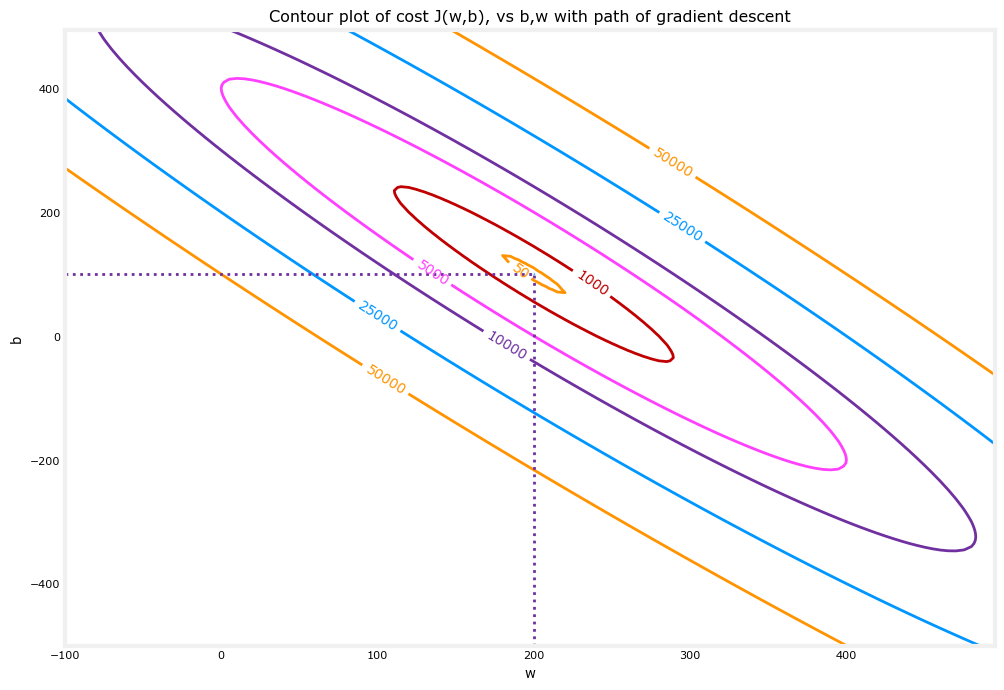

In [138]:
#display progress of gradient descent during its execution by plotting the cost over 
#iterations on a contour plot on the cost(w,b)
fig, ax = plt.subplots(1,1, figsize = (12,8))
plt_contour_wgrad(x_train,y_train,p_hist,ax)

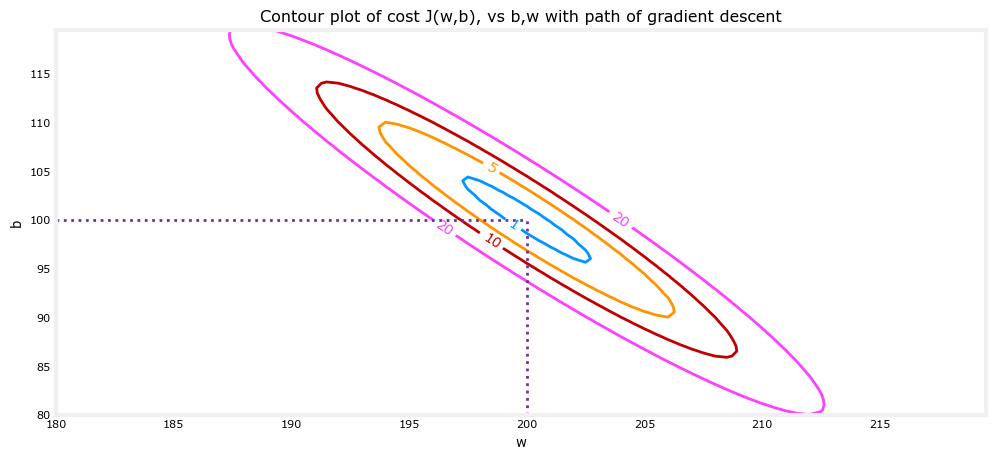

In [132]:
#Algorithm zooms in to view the final steps of gradient descent

fig, ax = plt.subplots(1,1, figsize=(12,5))
plt_contour_wgrad(x_train,y_train,p_hist,ax, w_range = [180,220,0.5], b_range = [80,120,0.5],
                  contours = [1,5,10,20], resolution = 0.5)


In [134]:
#Increase the value of alpha and visualize the large steps in Gradient Descent
w_init = 0
b_init = 0
#set alpha to a large value
iterations = 10
tmp_alpha = 8.0e-1
#run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)

Iteration    0: Cost4.18e+05 dj_dw: -6.500e+02, dj_db: -6.500e+02 w:5.200e+02, b: 5.20000e+02
Iteration    1: Cost2.01e+06 dj_dw:  1.430e+03, dj_db:  1.430e+03 w:-6.240e+02, b:-6.24000e+02
Iteration    2: Cost9.74e+06 dj_dw: -3.146e+03, dj_db: -3.146e+03 w:1.893e+03, b: 1.89280e+03
Iteration    3: Cost4.71e+07 dj_dw:  6.921e+03, dj_db:  6.921e+03 w:-3.644e+03, b:-3.64416e+03
Iteration    4: Cost2.28e+08 dj_dw: -1.523e+04, dj_db: -1.523e+04 w:8.537e+03, b: 8.53715e+03
Iteration    5: Cost1.10e+09 dj_dw:  3.350e+04, dj_db:  3.350e+04 w:-1.826e+04, b:-1.82617e+04
Iteration    6: Cost5.34e+09 dj_dw: -7.370e+04, dj_db: -7.370e+04 w:4.070e+04, b: 4.06958e+04
Iteration    7: Cost2.58e+10 dj_dw:  1.621e+05, dj_db:  1.621e+05 w:-8.901e+04, b:-8.90108e+04
Iteration    8: Cost1.25e+11 dj_dw: -3.567e+05, dj_db: -3.567e+05 w:1.963e+05, b: 1.96344e+05
Iteration    9: Cost6.05e+11 dj_dw:  7.847e+05, dj_db:  7.847e+05 w:-4.314e+05, b:-4.31436e+05


IndexError: list index out of range